# Introdução

Este notebook tem o objetivo de utilizar o conjunto de dados de consumo de veículos elétricos 
para realizar as etapas de pré-processamento de dados, divisão da base, treinamento de modelos
do tipo MLP, busca por otimização de hyperparâmetros e estrutura da rede neural e uma portabilidade
para execução da rede resultante em arquitetura esp32. 
Cada uma das atividades indicas é desenvolvida em um dos itens a seguir. Ressalta-se que não se 
buscou a excelência do resulto, mas a estruturação do código e a demonstração da possibilidade e
de como se alcançar o objetivo. 

O conjunto de dados não consta no repositório devido ao tamanho dos arquivos, mas pode ser obtido
em https://github.com/zhangsl2013/eVED . O dataset utilizado é uma exemplificação do trabalho a 
ser realizado no projeto DCAI, de modo que não se buscou trabalhar melhor os dados e nem efetivamente
encontrar a MLP ótima, uma vez que os dados serão diferentes.

# Concatenação dos Datasets

In [3]:
# O dataset eVED é disponibilizado fragmentado em diversos csvs. Para a sua utilização, é necessária a concatenação dos arquivos em um dataframe
# Aqui encontram-se as importações de bibliotecas necessárias para realizar a concatenação
import pandas as pd
import glob
import os

In [4]:
# Lista todos os arquivos csv contidos na pasta do dataset eved
filelist = glob.glob(os.path.join("./eVED/", '*.csv'))
dataframes = []

# Itera por todos os arquivos, lendo-os para memória e adicionando em uma lista de dataframes
for filename in sorted(filelist): 
    print (str(filename))
    dataframes.append(pd.read_csv(filename))

# Concatena todos os dataframes lidos
data = pd.concat(dataframes)
data.shape

./eVED/eVED_171101_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_171108_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_171115_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_171122_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_171129_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_171206_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_171213_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_171220_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_171227_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180103_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180110_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180117_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180124_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180131_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180207_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180214_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180221_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180228_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180307_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180314_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180321_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180328_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180404_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180411_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180418_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180425_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180502_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180509_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180516_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180523_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180530_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180606_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180613_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180620_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180627_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180704_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180711_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180718_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180725_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180801_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180808_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180815_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180822_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180829_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180905_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180912_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180919_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_180926_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_181003_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_181010_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_181017_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_181024_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_181031_week.csv


/tmp/ipykernel_17623/2094058288.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(filename))


./eVED/eVED_181107_week.csv


(22436808, 36)

In [6]:
# Escreve o dataset concatenado em um arquivo de saída
# df.to_csv("./dataset.csv", index=False)

# Pre-processamento dos Dados

In [1]:
# Para realizar o treinamento das redes neurais do tipo MLP, é necessário um pré-processamento mínimo,
# incluindo etapas como remoção de missing values e criação de dummies para colunas categóricas
# Importação da biblioteca necessária para o tratamento
import pandas as pd

In [2]:
# Leitura do dataset concatenado, caso não esteja em memória ainda
data = pd.read_csv("./dataset.csv")
data.head()

/tmp/ipykernel_6954/2953119222.py:1: DtypeWarning: Columns (31,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./dataset.csv")


,Unnamed: 0,DayNum,VehId,Trip,Timestamp(ms),Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],...,Matchted Latitude[deg],Matched Longitude[deg],Match Type,Class of Speed Limit,Speed Limit[km/h],Speed Limit with Direction[km/h],Intersection,Bus Stops,Focus Points,Focus Points;
0,0,1.586651,8.0,706.0,0.0,42.277558,-83.69875,40.0,22.129999,2285.0,...,42.277558,-83.698767,0,0.0,56,56.0,NaN,NaN,NaN,NaN
1,1,1.586651,8.0,706.0,200.0,42.277558,-83.69875,40.0,22.129999,2285.0,...,42.277558,-83.698767,1,0.0,56,56.0,NaN,NaN,NaN,NaN
2,2,1.586651,8.0,706.0,1100.0,42.277558,-83.69875,45.0,22.129999,2285.0,...,42.277558,-83.698767,1,0.0,56,56.0,NaN,NaN,NaN,NaN
3,3,1.586651,8.0,706.0,2100.0,42.277558,-83.69875,47.0,6.150000,2744.0,...,42.277558,-83.698767,1,0.0,56,56.0,NaN,NaN,NaN,NaN
4,4,1.586651,8.0,706.0,4200.0,42.277558,-83.69875,48.0,21.440001,1982.0,...,42.277558,-83.698767,1,0.0,56,56.0,NaN,NaN,NaN,NaN


In [3]:
# Exploração das colunas disponíveis e seus tipos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22436808 entries, 0 to 22436807
Data columns (total 37 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0                        int64  
 1   DayNum                            float64
 2   VehId                             float64
 3   Trip                              float64
 4   Timestamp(ms)                     float64
 5   Latitude[deg]                     float64
 6   Longitude[deg]                    float64
 7   Vehicle Speed[km/h]               float64
 8   MAF[g/sec]                        float64
 9   Engine RPM[RPM]                   float64
 10  Absolute Load[%]                  float64
 11  OAT[DegC]                         float64
 12  Fuel Rate[L/hr]                   float64
 13  Air Conditioning Power[kW]        float64
 14  Air Conditioning Power[Watts]     float64
 15  Heater Power[Watts]               float64
 16  HV Battery Current[A]             

In [4]:
# Removendo colunas que estão inteiramente compostas por missing values
# A utilização de inplace é primordial para economia de memória, uma vez que o dataset é grande
data.drop(
    columns=[
        "Unnamed: 0", 
        "DayNum", 
        "VehId", 
        "Trip", 
        "Timestamp(ms)", 
        "Fuel Rate[L/hr]", 
        "Air Conditioning Power[kW]", 
        "Air Conditioning Power[Watts]", 
        "Heater Power[Watts]",
        "HV Battery Current[A]",
        "HV Battery SOC[%]",
        "HV Battery Voltage[V]",
        "Short Term Fuel Trim Bank 2[%]",
        "Long Term Fuel Trim Bank 2[%]",
        "Intersection",
        "Bus Stops",
        "Focus Points",
        "Focus Points;",
        "OAT[DegC]"
    ], 
    inplace=True
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22436808 entries, 0 to 22436807
Data columns (total 18 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Latitude[deg]                     float64
 1   Longitude[deg]                    float64
 2   Vehicle Speed[km/h]               float64
 3   MAF[g/sec]                        float64
 4   Engine RPM[RPM]                   float64
 5   Absolute Load[%]                  float64
 6   Short Term Fuel Trim Bank 1[%]    float64
 7   Long Term Fuel Trim Bank 1[%]     float64
 8   Elevation Raw[m]                  float64
 9   Elevation Smoothed[m]             float64
 10  Gradient                          float64
 11  Energy_Consumption                float64
 12  Matchted Latitude[deg]            float64
 13  Matched Longitude[deg]            float64
 14  Match Type                        int64  
 15  Class of Speed Limit              float64
 16  Speed Limit[km/h]                 

In [5]:
# Removendo as linhas que estão com missing values nas colunas selecionadas
data.dropna(
    subset=[
        "Vehicle Speed[km/h]", 
        "MAF[g/sec]", 
        "Engine RPM[RPM]", 
        "Absolute Load[%]", 
        "Gradient", 
        "Class of Speed Limit", 
        "Short Term Fuel Trim Bank 1[%]", 
        "Long Term Fuel Trim Bank 1[%]", 
        "Energy_Consumption"
    ], 
    inplace=True
)

In [6]:
# Renomeando um erro de grafia do dataset original
data.rename(columns={"Matchted Latitude[deg]": "Matched Latitude[deg]"}, inplace=True)

In [7]:
# O limite de velocidade na via não interfere se eu já tenho a velocidade do veículo
# Removendo colunas que são desnecessariamente complicadas
data.drop(
    columns=[
        "Class of Speed Limit",
        "Speed Limit[km/h]",
        "Speed Limit with Direction[km/h]"
    ], 
    inplace=True
)

In [8]:
# O dataset obtido após a remoção de missing values possui mais de 10 milhões de linhas e 15 colunas
data.shape

(10845038, 15)

In [9]:
# Colunas restantes e os seus respectivos tipos
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10845038 entries, 95220 to 22436807
Data columns (total 15 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Latitude[deg]                   float64
 1   Longitude[deg]                  float64
 2   Vehicle Speed[km/h]             float64
 3   MAF[g/sec]                      float64
 4   Engine RPM[RPM]                 float64
 5   Absolute Load[%]                float64
 6   Short Term Fuel Trim Bank 1[%]  float64
 7   Long Term Fuel Trim Bank 1[%]   float64
 8   Elevation Raw[m]                float64
 9   Elevation Smoothed[m]           float64
 10  Gradient                        float64
 11  Energy_Consumption              float64
 12  Matched Latitude[deg]           float64
 13  Matched Longitude[deg]          float64
 14  Match Type                      int64  
dtypes: float64(14), int64(1)
memory usage: 1.3 GB


In [10]:
# A coluna Match Type é categórica e precisa ser tratada para não refletir uma ordem de grandeza
data = pd.get_dummies(data, columns=["Match Type"], dtype=int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10845038 entries, 95220 to 22436807
Data columns (total 17 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Latitude[deg]                   float64
 1   Longitude[deg]                  float64
 2   Vehicle Speed[km/h]             float64
 3   MAF[g/sec]                      float64
 4   Engine RPM[RPM]                 float64
 5   Absolute Load[%]                float64
 6   Short Term Fuel Trim Bank 1[%]  float64
 7   Long Term Fuel Trim Bank 1[%]   float64
 8   Elevation Raw[m]                float64
 9   Elevation Smoothed[m]           float64
 10  Gradient                        float64
 11  Energy_Consumption              float64
 12  Matched Latitude[deg]           float64
 13  Matched Longitude[deg]          float64
 14  Match Type_0                    int64  
 15  Match Type_1                    int64  
 16  Match Type_2                    int64  
dtypes: float64(14), int64(3)
m

In [11]:
# Dataset final obtido com 16 colunas de entrada, 1 de saída e mais de 10 milhões de registros
data.head()

,Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 1[%],Elevation Raw[m],Elevation Smoothed[m],Gradient,Energy_Consumption,Matched Latitude[deg],Matched Longitude[deg],Match Type_0,Match Type_1,Match Type_2
95220,42.242235,-83.767309,33.0,32.799999,1348.0,45.490196,-3.90625,-3.125,279.584839,279.584839,0.0,0.006692,42.242183,-83.767381,1,0,0
95221,42.242235,-83.767309,37.0,32.799999,1348.0,45.490196,-3.90625,-3.125,279.584839,279.584839,0.0,0.007503,42.242183,-83.767381,0,1,0
95222,42.242235,-83.767309,39.0,32.799999,1348.0,45.490196,-3.90625,-3.125,279.584839,279.584839,0.0,0.007909,42.242183,-83.767381,0,1,0
95223,42.242235,-83.767309,39.0,32.799999,1422.0,45.490196,-3.90625,-3.125,279.584839,279.584839,0.0,0.007909,42.242183,-83.767381,0,1,0
95224,42.242235,-83.767309,39.0,12.660000,1422.0,45.490196,-3.90625,-3.125,279.584839,279.584839,0.0,0.003053,42.242183,-83.767381,0,1,0


In [12]:
# Salvando o dataset filtrado final em um arquivo.
# Este arquivo ficou com 1.7GB, muito menor que o dataset original
data.to_csv("./dataset_filtered.csv", index=False)

# Treinamento do Modelo

## Leitura, Divisão e Normalização

In [1]:
# Antes do treinamento do modelo, é necessário carregar a base em memória, caso ainda não tenha sido feito.
# Após isto, precisa-se dividir a base em treino e teste. Aqui está sendo disponibilizado um conjunto de 
# normalizadores dos valores para o teste da performance ao final. 
# Caso seja do desejo, escolher o melhor normalizador dos dados e utilizar, verificando a performance no final
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Leitura do dataset final para memória, caso ainda não tenha sido feito
data = pd.read_csv("./dataset_filtered.csv")
data.head()

,Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],Short Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 1[%],Elevation Raw[m],Elevation Smoothed[m],Gradient,Energy_Consumption,Matched Latitude[deg],Matched Longitude[deg],Match Type_0,Match Type_1,Match Type_2
0,42.242235,-83.767309,33.0,32.799999,1348.0,45.490196,-3.90625,-3.125,279.584839,279.584839,0.0,0.006692,42.242183,-83.767381,1,0,0
1,42.242235,-83.767309,37.0,32.799999,1348.0,45.490196,-3.90625,-3.125,279.584839,279.584839,0.0,0.007503,42.242183,-83.767381,0,1,0
2,42.242235,-83.767309,39.0,32.799999,1348.0,45.490196,-3.90625,-3.125,279.584839,279.584839,0.0,0.007909,42.242183,-83.767381,0,1,0
3,42.242235,-83.767309,39.0,32.799999,1422.0,45.490196,-3.90625,-3.125,279.584839,279.584839,0.0,0.007909,42.242183,-83.767381,0,1,0
4,42.242235,-83.767309,39.0,12.660000,1422.0,45.490196,-3.90625,-3.125,279.584839,279.584839,0.0,0.003053,42.242183,-83.767381,0,1,0


In [3]:
# Exibição das colunas e dos tipos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845038 entries, 0 to 10845037
Data columns (total 17 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Latitude[deg]                   float64
 1   Longitude[deg]                  float64
 2   Vehicle Speed[km/h]             float64
 3   MAF[g/sec]                      float64
 4   Engine RPM[RPM]                 float64
 5   Absolute Load[%]                float64
 6   Short Term Fuel Trim Bank 1[%]  float64
 7   Long Term Fuel Trim Bank 1[%]   float64
 8   Elevation Raw[m]                float64
 9   Elevation Smoothed[m]           float64
 10  Gradient                        float64
 11  Energy_Consumption              float64
 12  Matched Latitude[deg]           float64
 13  Matched Longitude[deg]          float64
 14  Match Type_0                    int64  
 15  Match Type_1                    int64  
 16  Match Type_2                    int64  
dtypes: float64(14), int64(3)


In [4]:
# Divisão da base em colunas de entrada e coluna de rótulo
x = data.drop(columns=["Energy_Consumption"])
y = data["Energy_Consumption"]

# Definição de um SEED para reprodutibilidade das partes aleatórias
SEED = 12345

# Divisão da base em trein e teste
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.3, random_state=SEED)

In [25]:
# Sem normalização
trainX_scaled = trainX.to_numpy()
testX_scaled = testX.to_numpy()

In [9]:
# Normalização Padrão
standard_scaler = StandardScaler()

scaler = standard_scaler.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [21]:
# Normalização pelo MinMax
min_max_scaler = MinMaxScaler()

scaler = min_max_scaler.fit(trainX)
trainX_scaled = scaler.transform(trainX)
textX_scaled = scaler.transform(testX)

## Usando Sklearn MLPRegressor com GridSearchCV

In [29]:
# https://michael-fuchs-python.netlify.app/2021/02/10/nn-multi-layer-perceptron-regressor-mlpregressor/
# A primeira tentativa de se obter uma rede neural do tipo MLP otimizada foi utilizando o MLPRegressor da
# biblioteca SKLearn com o GridSearch CV. No entanto, ao final deste notebook, é necessária a portabilidade
# do modelo obtido para a arquitetura esp32. Esta portabilidade é realizada utilizando a biblioteca TensorFlow Lite.

# Observe que nada impede a busca do melhor modelo com o MLPRegressor com GridSearchCV que é efetivamente mais
# simples e performático e, posteriormente, utilizar o resultado para construir uma rede única com o TF e Keras, 
# portando para o esp32 em seguida. Em virtude desta observação, este trecho de códigog se manteve aqui no 
# notebook.
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [24]:
# Criando uma rede neural MLP com o sklearn para exemplo
mlp = MLPRegressor(
    hidden_layer_sizes=(32, 16, 8),
    max_iter=50,
    activation='relu',
    solver='adam',
    alpha=0.05,
    learning_rate='constant'
)

# Treinamento da rede com a base de treino
mlp.fit(trainX_scaled, trainY)

/home/andre/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(alpha=0.05, hidden_layer_sizes=(32, 16, 8), max_iter=50)

In [16]:
# Realizando predições com a base de testes
y_pred = mlp.predict(testX_scaled)

In [22]:
# Criando um grid de parâmetros possíveis para realizar a busca do tuning
param_grid = {
    'hidden_layer_sizes': [(32, 16, 8)],
    'max_iter': [50],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptative']
}

# Construindo o grid e fazendo os diversos treinamentos para achar o melhor.
# Aqui está sendo utilizando um cross validation com 5 folds e indicando à biblioteca
# que utilize quantas threads forem os núcleos do equipamento
grid = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5)
grid.fit(trainX_scaled, trainY)

# Imprimindo o melhor conjuntos de parâmetros, os quais podem ser utilizados diretamente no TFLite para a portabilidade para esp32
grid.best_params_

InvalidParameterError: The 'cv' parameter of GridSearchCV must be an int in the range [2, inf), an object implementing 'split' and 'get_n_splits', an iterable or None. Got 1 instead.

In [ ]:
# Realização de predições com o melhor modelo obtido no gridsearch
grid_predictions = grid.predict(testX_scaled)

## Usando TensorFlow

In [6]:
# https://www.tensorflow.org/tutorials/keras/regression?hl=pt-br
# A partir deste ponto, será realizado exatamente o mesmo procedimento do item anterior, no entanto
# realizado com o TensorFlow e o Keras
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers, regularizers

tf.__version__

2024-10-31 11:39:48.182764: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-31 11:39:48.571177: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-31 11:39:49.246727: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'2.16.1'

In [15]:
# Função para construir um modelo de rede neural MLP com o tensor flow
# Esta função recebe como parâmetro o model_type. O valor thomas indica para
# montar uma rede semelhante àquela produzida no tutorial do autor Thomas.
# O valor tensor, indica para criar uma rede semelhante a do tutorial do 
# próprio tensorflow.
def build_model(model_type):
    if model_type == 'thomas':
        # Criando uma rede semelhante a do tutorial do thomas
        # Uma camada de entrada, 3 camadas escondidas (32, 16 e 8), uma camada de saída para indicar o valor do consumo
        # Utiliza como função de ativação a relu nas camadas escondidas com regularizadores L2.
        # Para a camada de saída é utilizada uma função linear. O otimizador é o adam.
        model = keras.Sequential(
            [
                layers.Dense(
                    32, 
                    activation='relu', 
                    kernel_regularizer=regularizers.l2(0.0001),
                    input_shape=[len(trainX_scaled[0])]
                ),
                layers.Dense(
                    16, 
                    activation='relu', 
                    kernel_regularizer=regularizers.l2(0.0001),
                ),
                layers.Dense(
                    8, 
                    activation='relu', 
                    kernel_regularizer=regularizers.l2(0.0001),
                ),
                layers.Dense(
                    1, 
                    activation='linear'
                ),
            ]
        )
        optimizer = 'adam'
    elif model_type == 'tensor':
        # Rede exemplo do tutorial do tensorflow.
        # Possui uma camada de entrada, duas camadas escondidas de 64 neurônios cada uma, com função de ativação relu.
        # O otimizador é o RMSprop
        model = keras.Sequential([
            layers.Dense(64, activation='relu', input_shape=[len(trainX_scaled[0])]),
            layers.Dense(64, activation='relu'),
            layers.Dense(1)
        ])

        optimizer = tf.keras.optimizers.RMSprop(0.001)

    # Como função de perda foi escolhida a mse e para métricas a própria mse e a mae
    model.compile(
        loss='mse',
        optimizer=optimizer,
        metrics=['mae', 'mse']
    )

    return model

In [26]:
# Criando um modelo do tipo exibido no tutorial do tensorflow e exibindo o resumo da rede
model = build_model(model_type='tensor')
model.summary()

/home/andre/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,313 (20.75 KB)

 Trainable params: 5,313 (20.75 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Criando uma callback para early stopping no treinamento da rede neural
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Treinando um exemplo de modelo de rede neural MLP
history = model.fit(
    trainX_scaled,
    trainY,
    batch_size=128,
    epochs=10,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/10
47448/47448 ━━━━━━━━━━━━━━━━━━━━ 22s 461us/step - loss: 20.3011 - mae: 1.2359 - mse: 20.3011 - val_loss: 1.0464 - val_mae: 0.0066 - val_mse: 1.0464
Epoch 2/10
47448/47448 ━━━━━━━━━━━━━━━━━━━━ 22s 458us/step - loss: 0.4926 - mae: 0.0050 - mse: 0.4926 - val_loss: 0.4117 - val_mae: 0.0080 - val_mse: 0.4117
Epoch 3/10
47448/47448 ━━━━━━━━━━━━━━━━━━━━ 24s 514us/step - loss: 0.2767 - mae: 0.0038 - mse: 0.2767 - val_loss: 0.0130 - val_mae: 0.0017 - val_mse: 0.0130
Epoch 4/10
47448/47448 ━━━━━━━━━━━━━━━━━━━━ 25s 517us/step - loss: 0.3403 - mae: 0.0037 - mse: 0.3403 - val_loss: 0.3540 - val_mae: 0.0051 - val_mse: 0.3540
Epoch 5/10
47448/47448 ━━━━━━━━━━━━━━━━━━━━ 25s 515us/step - loss: 0.2272 - mae: 0.0032 - mse: 0.2272 - val_loss: 0.0853 - val_mae: 0.0029 - val_mse: 0.0853
Epoch 6/10
47448/47448 ━━━━━━━━━━━━━━━━━━━━ 25s 516us/step - loss: 0.2393 - mae: 0.0032 - mse: 0.2393 - val_loss: 0.5228 - val_mae: 0.0041 - val_mse: 0.5228
Epoch 7/10
47448/47448 ━━━━━━━━━━━━━━━━━━━━ 25s 518us/st

In [28]:
# Função para plotar dois gráficos (mae e mse) das métricas de treinamento
# O primeiro gráfico é da mae e o segundo da mse, neles são exibidas duas linhas, sendo uma de validação e a outra do treinamento
def plot_history(history):
    df_hist = pd.DataFrame(history.history)
    df_hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.plot(df_hist['epoch'], df_hist['mae'], label='Train Error')
    plt.plot(df_hist['epoch'], df_hist['val_mae'], label='Val Error')
    # plt.ylim([0, 5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(df_hist['epoch'], df_hist['mse'], label='Train Error')
    plt.plot(df_hist['epoch'], df_hist['val_mse'], label='Val Error')
    # plt.ylim([0, 20])
    plt.legend()
    plt.show()

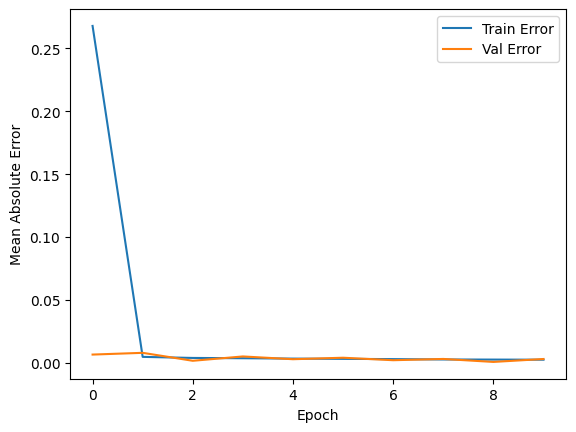

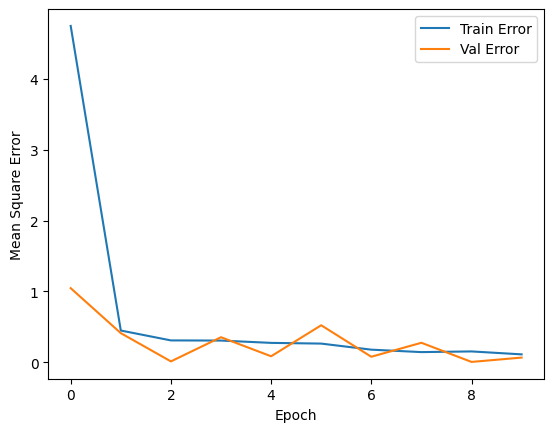

In [29]:
plot_history(history)

In [30]:
# Impressão de mais métricas para avaliação do modelo treinado
loss, mae, mse = model.evaluate(testX_scaled, testY, verbose=2)
print(f"Testing set Mean Abs Error: {mae}")

101673/101673 - 23s - 224us/step - loss: 0.0793 - mae: 0.0033 - mse: 0.0793
Testing set Mean Abs Error: 0.0032719101291149855


In [44]:
# Realização de uma predição com o modelo treinado
predictions = model.predict(testX_scaled).flatten()

101673/101673 ━━━━━━━━━━━━━━━━━━━━ 25s 250us/step


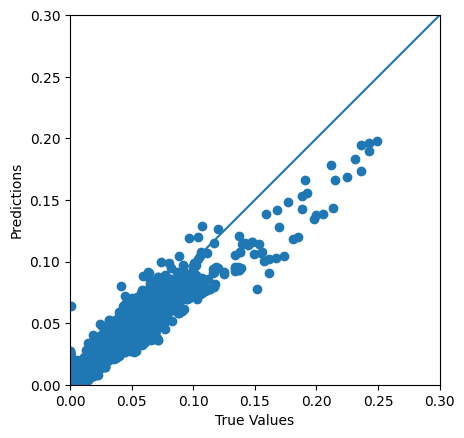

In [45]:
# Plotagem entre os valores preditos e reais nos testes. Quando mais pontos estiverem sobre a linha da diagonail x=y, melhor
plt.figure()
plt.scatter(testY.to_numpy(), predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, 0.3])
plt.ylim([0, 0.3])
plt.plot([-100, 100], [-100, 100])

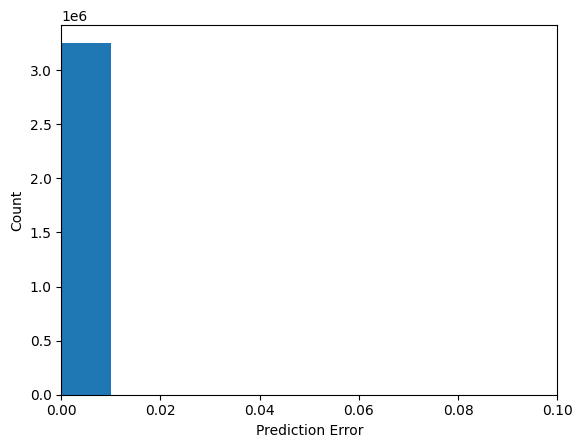

In [63]:
# Plotagem com histograma dos erros. No entanto, não funcionou muito bem em virtude da magnitude dos erros e de outliers
error = predictions - testY
plt.figure()
plt.hist(error, bins = 1000)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.xlim([0, 0.1])
plt.show()

# Tuning de Hyperparametros

In [65]:
# O equivalente ao GridSearch para o TensorFlow com Keras é o keras-tuner
# Preciso fazer a instalação do pacote para poder utilizar
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 373.1 kB/s eta 0:00:00 kB/s eta 0:00:01:01


In [66]:
# https://www.tensorflow.org/tutorials/keras/keras_tuner?hl=pt-br
# Importação das bibliotecas necessárias para fazer o search dos hyperparâmetros das possíveis redes neurais
import tensorflow as tf
import keras_tuner as kt

from tensorflow import keras

In [69]:
# Essa é uma nova definição da função que monta a rede neural.
# A primeira definição monta uma única rede neural já de uma maneira rígida.
# Essa função aceita uma variação dos parâmetros como é feito no GridSearch
def model_builder(hp):
    model = keras.Sequential()
    
    # Camada de entrada
    # Apareceu um warning indicando que não é necessário definir a camada de entrada
    # model.add(keras.layers.Flatten(input_shape=[len(trainX_scaled[0])]))

    # Primeira camada escondida variada
    # Essa função de builder recebe um objeto hp que serve para definir os ranges dos parâmetros de busca
    # Aqui estou indicando que irei variar um inteiro de 32 a 64 com steps de 16
    # Em seguida, eu adiciono uma camada com função de ativação relu, sendo que o número de neurônios varia conforme o hp_units
    hp_units = hp.Int('units', min_value=32, max_value=64, step=16)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))

    # Segunda camada escondida definida como fixa com 16 neurônios e função de ativação relu
    model.add(keras.layers.Dense(16, activation='relu'))

    # Camada de saída definida como fixa com 1 neurônio e função de ativação linear
    model.add(keras.layers.Dense(1, activation='linear'))

    # Learning rate variável
    # Novamente, eu uso o hp que o builder recebe para fazer a possibilidade de variação
    # Aqui estou variando o parâmetro learning_rate nas seguintes escolhas possíveis 1e-2, 1e-3 e 1e-4
    hp_learning_rate = hp.Choice(
        'learning_rate',
        values=[1e-2, 1e-3, 1e-4]
    )

    # Montando o modelo
    # Na compilação do modelo, eu tenho que definir o optimizer com um learning_rate, justamente o qual eu coloco o hp_learning_rate para deixar variável
    # A métrica para a avaliação foi definida como acurácia, mas poderia mudar
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    return model

In [70]:
# Criando um keras-tuner do tipo Hyperband, mas poderia ser RandomSearch, Hyperband, BayesianOptimization e Sklearn
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='./model',
    project_name='primeiro'
)

In [72]:
# Novamente definindo um early stopping com paciência até menor que a anterior.
# Caso não se tenha um ganho no val_loss significativo após 5 épocas, ele para o treinamento.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [73]:
# Realização da busca de hyperparâmetros segundo o que foi definido anteriormente
tuner.search(
    trainX_scaled,
    trainY,
    epochs=50,
    validation_split=0.2, 
    callbacks=[early_stop]
)

# Melhores parâmetros obtidos
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps

Trial 9 Complete [00h 02m 19s]
val_accuracy: 0.10912622511386871

Best val_accuracy So Far: 0.10912622511386871
Total elapsed time: 00h 25m 35s


In [74]:
# Construindo o modelo com os melhores parâmetros
model = tuner.hypermodel.build(best_hps)

# Realizando o treinamento com os dados
history = model.fit(
    trainX_scaled,
    trainY,
    epochs=10, 
    validation_split=0.2
)

# Pegando a melhor época
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1

best_epoch

Epoch 1/10
189789/189789 ━━━━━━━━━━━━━━━━━━━━ 63s 327us/step - accuracy: 0.0115 - loss: 0.0000e+00 - val_accuracy: 0.0114 - val_loss: 0.0000e+00
Epoch 2/10
189789/189789 ━━━━━━━━━━━━━━━━━━━━ 72s 377us/step - accuracy: 0.0115 - loss: 0.0000e+00 - val_accuracy: 0.0114 - val_loss: 0.0000e+00
Epoch 3/10
189789/189789 ━━━━━━━━━━━━━━━━━━━━ 69s 365us/step - accuracy: 0.0116 - loss: 0.0000e+00 - val_accuracy: 0.0114 - val_loss: 0.0000e+00
Epoch 4/10
189789/189789 ━━━━━━━━━━━━━━━━━━━━ 67s 352us/step - accuracy: 0.0115 - loss: 0.0000e+00 - val_accuracy: 0.0114 - val_loss: 0.0000e+00
Epoch 5/10
189789/189789 ━━━━━━━━━━━━━━━━━━━━ 67s 353us/step - accuracy: 0.0116 - loss: 0.0000e+00 - val_accuracy: 0.0114 - val_loss: 0.0000e+00
Epoch 6/10
189789/189789 ━━━━━━━━━━━━━━━━━━━━ 65s 339us/step - accuracy: 0.0115 - loss: 0.0000e+00 - val_accuracy: 0.0114 - val_loss: 0.0000e+00
Epoch 7/10
189789/189789 ━━━━━━━━━━━━━━━━━━━━ 69s 361us/step - accuracy: 0.0116 - loss: 0.0000e+00 - val_accuracy: 0.0114 - val_lo

1

In [75]:
# Treinamento do modelo com os melhores parâmetros e melhor época
hypermodel = tuner.hypermodel.build(best_hps)
history = hypermodel.fit(
    trainX_scaled,
    trainY,
    epochs=best_epoch, 
    validation_split=0.2
)

189789/189789 ━━━━━━━━━━━━━━━━━━━━ 64s 337us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


In [77]:
# Avaliação dos resultados
eval_result = hypermodel.evaluate(testX_scaled, testY)
print("[test loss, test accuracy]:", eval_result)

101673/101673 ━━━━━━━━━━━━━━━━━━━━ 22s 213us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
[test loss, test accuracy]: [0.0, 0.0]


In [80]:
# Avaliação dos resultados
eval_result = model.evaluate(testX_scaled, testY)
print("[test loss, test accuracy]:", eval_result)

101673/101673 ━━━━━━━━━━━━━━━━━━━━ 21s 209us/step - accuracy: 0.0116 - loss: 0.0000e+00
[test loss, test accuracy]: [0.0, 0.011541374027729034]


In [ ]:
# Leituras futuras sobre o keras-tuner. Tem um tensorboard que parece interessante por mostrar graficamente as redes e as buscas por hyperparâmetros
# https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html?hl=pt-br&_gl=1*16he0rb*_ga*NjU4MDE2Mjg2LjE3Mjc3MTUxNjE.*_ga_W0YLR4190T*MTczMDM4Njc1NC40LjEuMTczMDM4Nzc5NC4wLjAuMA..
# https://keras.io/keras_tuner/
# https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams?hl=pt-br

# Portando para o Esp32

In [96]:
# A fase final é a exportação do modelo obtido para a arquitetura esp32 a fim de ser executada no freematics
# Importação das bibliotecas necessárias
import os
import numpy as np

In [97]:
# Função para excrever a biblioteca que leva o modelo em hexadecimal
def hex_to_c_array(hex_data, var_name):  
    # Start Header
    starting_header = """#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif
    
"""

    # Declare C variable
    declare_variable = f"const unsigned char {var_name}[]  DATA_ALIGN_ATTRIBUTE = " + "{"

    # Constructing Hex
    hex_array = []
    for i, val in enumerate(hex_data):
        # Parsing hex to string
        hex_str = format(val, '#04x')

        # Lines with 80 chars
        if (i + 1) < len(hex_data):
            hex_str += ','
        if (i + 1) % 12 == 0:
            hex_str += '\n '
        hex_array.append(hex_str)
    hex = '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

    # Close Header
    closing_header = f"const int {var_name}_len = {str(len(hex_data))};\n"

    return starting_header + declare_variable + hex + closing_header

In [98]:
def representative_dataset():
    for i in range(len(trainX_scaled)):
        input_data = np.array([trainX_scaled[i]], dtype=np.float32)
        yield [input_data]

In [99]:
# Conversor para a arquitetura esp32 com TFLite e o Keras
def converter_quantization_model(model, model_name, quant_type):
    # É necessário exportar o modelo da memória para o arquivo e carregar em seguida
    # A conversão direta como está na linha comentada gera erro no keras.
    model.export(f"./MLP/temp/{model_name}")
    converter = tf.lite.TFLiteConverter.from_saved_model(f"./MLP/temp/{model_name}")
    # converter = tf.lite.TFLiteConverter.from_keras_model(model)

    
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    converter.target_spec.supported_types = [quant_type]

    # Quantizações de 32 e 8 bits
    if quant_type == tf.float32:
        converter._experimental_lower_tensor_list_ops = False
        converter.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
    elif quant_type == tf.int8:
        # converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8, tf.lite.OpsSet.SELECT_TF_OPS]
        # converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
        converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
        converter.experimental_new_converter = True
        converter.experimental_new_quantizer = True
        converter.experimental_new_calibrator = True
    
    converter.representative_dataset = representative_dataset
    tflite_model = converter.convert()

    
    print(tflite_model)

    with open(f"./MLP/models/{model_name}.h", 'w') as file:
        file.write(hex_to_c_array(tflite_model, model_name))

    with open(f"./MLP/models/{model_name}.tflite", 'wb') as file:
        file.write(tflite_model)

    size_model_tflite = os.path.getsize(f"./MLP/models/{model_name}.tflite")
    print(f"./MLP/models/{model_name}.tflite: {size_model_tflite} Bytes")

In [100]:
# Gerando as bibliotecas de 32 e 8 bits para juntar no projeto do esp32
converter_quantization_model(model, "Primeiro_float32", tf.float32)
converter_quantization_model(model, "Primeiro_int8", tf.int8)

INFO:tensorflow:Assets written to: ./MLP/temp/Primeiro_float32/assets


INFO:tensorflow:Assets written to: ./MLP/temp/Primeiro_float32/assets


Saved artifact at './MLP/temp/Primeiro_float32'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 16), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133792861194576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861193616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861192464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861195344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861193424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861197840: TensorSpec(shape=(), dtype=tf.resource, name=None)
b'\x1c\x00\x00\x00TFL3\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x98\x00\x00\x00\xf0\x00\x00\x00\x14\x12\x00\x00$\x12\x00\x00,\x16\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x10\x00\x00\x00\x00\x00\n\x00\x10\x00\x0c\x00\x08\x00\

W0000 00:00:1730392111.517996    5163 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1730392111.518005    5163 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2024-10-31 13:28:31.518105: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: ./MLP/temp/Primeiro_float32
2024-10-31 13:28:31.518401: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-10-31 13:28:31.518407: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: ./MLP/temp/Primeiro_float32
2024-10-31 13:28:31.521635: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2024-10-31 13:28:31.534768: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: ./MLP/temp/Primeiro_float32
2024-10-31 13:28:31.539055: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 20950 microseconds.
INFO:tensorf

Saved artifact at './MLP/temp/Primeiro_int8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 16), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133792861194576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861193616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861192464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861195344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861193424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133792861197840: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1730392111.668295    5163 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1730392111.668316    5163 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2024-10-31 13:28:31.668434: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: ./MLP/temp/Primeiro_int8
2024-10-31 13:28:31.668713: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-10-31 13:28:31.668720: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: ./MLP/temp/Primeiro_int8
2024-10-31 13:28:31.672061: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2024-10-31 13:28:31.685592: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: ./MLP/temp/Primeiro_int8
2024-10-31 13:28:31.689765: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 21335 microseconds.


b' \x00\x00\x00TFL3\x00\x00\x00\x00\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x8c\x00\x00\x00\x0c\x01\x00\x004\x06\x00\x00D\x06\x00\x00t\x0c\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00z\xf9\xff\xff\x0c\x00\x00\x00\x1c\x00\x00\x00<\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00h\xff\xff\xff\x08\x00\x00\x00\x04\x00\x00\x00\x08\x00\x00\x00output_0\x00\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00^\xfa\xff\xff\x04\x00\x00\x00\x0e\x00\x00\x00keras_tensor_4\x00\x00\x03\x00\x00\x00\\\x00\x00\x00,\x00\x00\x00\x04\x00\x00\x00\xb8\xff\xff\xff\x0c\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00CONVERSION_METADATA\x00\xdc\xff\xff\xff\x0b\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\x08\x00\x0c\x00\x08\x00\x04\x00\x08\x00\x00\x00\n\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\r\x00\x00\x00$\x05\x00\x00\x1c\x05\x00\x00\xfc\x04\x00\x00\xe4\x02\x00\x00\xd

fully_quantize: 0, inference_type: 6, input_inference_type: FLOAT32, output_inference_type: FLOAT32
